# Data Preperation

In [9]:
import os
import shutil
import random
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
# * Check and Remove non-image files

my_data_dir = '/workspaces/new-cherry-leaves/data/cherry-leaves'  


def remove_non_image_file(my_data_dir):
    """
    Removes non-image files from the specified directory and counts image/non-image files.

    Args:
        my_data_dir (str): Path to the directory containing the image files.
    """

image_extensions = ('.png', '.jpg', '.jpeg')

In [11]:
# Iterate through the healthy and powdery_mildew subfolders
for folder_name in ['healthy', 'powdery_mildew']:
    folder_path = os.path.join(my_data_dir, folder_name)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        image_count = 0
        non_image_count = 0
        for file in files:
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):
                if file.lower().endswith(image_extensions):
                    image_count += 1
                else:
                    os.remove(file_path)
                    non_image_count += 1
                    print(f"Removed non-image file: {file_path}")

        # Print the counts for the current folder
        print(f"Folder: {folder_name} - has image file: {image_count}")
        print(f"Folder: {folder_name} - has non-image file: {non_image_count}")

Folder: healthy - has image file: 2104
Folder: healthy - has non-image file: 0
Folder: powdery_mildew - has image file: 2104
Folder: powdery_mildew - has non-image file: 0


In [12]:
# Check for corrupted images
def check_for_corrupted_images(my_data_dir):
    """
    Checks for corrupted images in the specified directory and logs the results.

    Args:
        my_data_dir (str): Path to the directory containing the image files.
    """

    corrupted_files = []
    print("Checking for corrupted images...")
    for root, _, files in os.walk(my_data_dir):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()
            except (FileNotFoundError, OSError):
                corrupted_files.append(file_path)

    if corrupted_files:
        print("Corrupted files detected:")
        for file in corrupted_files:
            print(file)
    else:
        print("No corrupted files found.")

    with open("corrupted_files_log.txt", "w") as log_file:
        if corrupted_files:
            log_file.write("Corrupted files:\n")
            log_file.writelines([f"{file}\n" for file in corrupted_files])

    print("Check completed. Results logged to corrupted_files_log.txt")

In [13]:

# Split data into train, validation and test sets
def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
    """
    Split the dataset of images into train, validation, and test sets.

    Args:
        my_data_dir (str): Path to the dataset directory containing class folders.
        train_set_ratio (float): Proportion of data to be used for training.
        validation_set_ratio (float): Proportion of data to be used for validation.
        test_set_ratio (float): Proportion of data to be used for testing.

    Returns:
        None
    """

    if not abs(train_set_ratio + validation_set_ratio + test_set_ratio - 1.0) < 1e-6:
        raise ValueError("train_set_ratio, validation_set_ratio, and test_set_ratio should sum to 1.0.")

    labels = [label for label in os.listdir(my_data_dir) if os.path.isdir(os.path.join(my_data_dir, label))]

    for folder in ['train', 'validation', 'test']:
        if not os.path.exists(os.path.join(my_data_dir, folder)):
            for label in labels:
                os.makedirs(os.path.join(my_data_dir, folder, label), exist_ok=True)

    for label in labels:
        class_dir = os.path.join(my_data_dir, label)
        files = [file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))]
        random.shuffle(files)

        train_count = int(len(files) * train_set_ratio)
        val_count = int(len(files) * validation_set_ratio)

        train_files = files[:train_count]
        val_files = files[train_count:train_count + val_count]
        test_files = files[train_count + val_count:]

        for file in train_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(my_data_dir, 'train', label, file))

        for file in val_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(my_data_dir, 'validation', label, file))

        for file in test_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(my_data_dir, 'test', label, file))

        if not os.listdir(class_dir):
            os.rmdir(class_dir)

    print("Data successfully split into train, validation, and test sets.")

In [14]:
# Verify the class balance in the training set
def verify_class_balance(train_dir):
    """
    Verifies the class balance in the training set.

    Args:
        train_dir (str): Path to the training set directory.
    """

    train_classes = os.listdir(train_dir)
    train_class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in train_classes}
    print("Training Set Class Distribution:", train_class_counts)


In [15]:
# Visualise Class Distribution
def visualize_class_distribution(class_counts, title):
    """
    Visualizes the class distribution using a bar chart.

    Args:
        class_counts (dict): Dictionary containing class names as keys and image counts as values.
        title (str): Title of the chart.
    """

    plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red'])
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.show()

Checking for corrupted images...
No corrupted files found.
Check completed. Results logged to corrupted_files_log.txt
Data successfully split into train, validation, and test sets.
Training Set Class Distribution: {'powdery_mildew': 1262, 'healthy': 1262}


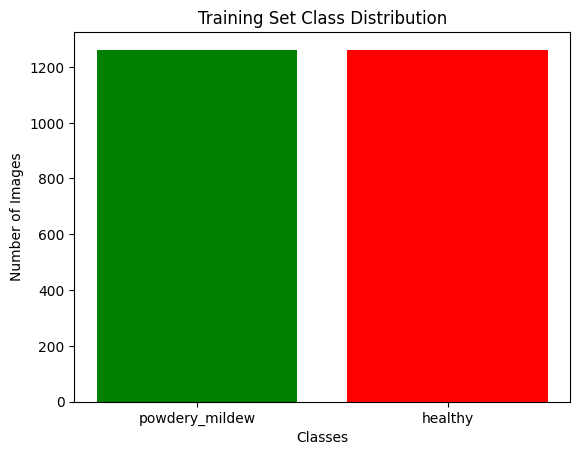

Validation Set Class Distribution: {'powdery_mildew': 420, 'healthy': 420}


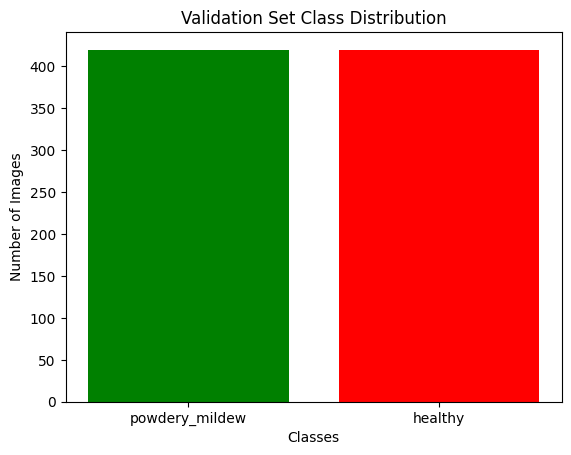

In [16]:
# Main execution block
if __name__ == "__main__":
    # Define the dataset directory
    my_data_dir = '/workspaces/new-cherry-leaves/data/cherry-leaves'

    # Remove non-image files
    remove_non_image_file(my_data_dir)

    # Check for corrupted images
    check_for_corrupted_images(my_data_dir)

    # Split data into train, validation, and test sets (adjust ratios as needed)
    split_train_validation_test_images(my_data_dir, train_set_ratio=0.6, validation_set_ratio=0.2, test_set_ratio=0.2)

    # Verify the class balance in the training set
    train_dir = os.path.join(my_data_dir, 'train')
    verify_class_balance(train_dir)

    # Visualize class distribution for training set
    train_classes = os.listdir(train_dir)
    train_class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in train_classes}
    visualize_class_distribution(train_class_counts, 'Training Set Class Distribution')

    # Verify the class balance in the validation set
    validation_dir = os.path.join(my_data_dir, 'validation')
    validation_classes = os.listdir(validation_dir)
    validation_class_counts = {cls: len(os.listdir(os.path.join(validation_dir, cls))) for cls in validation_classes}
    print("Validation Set Class Distribution:", validation_class_counts)

    # Visualize class distribution for validation set (optional)
    visualize_class_distribution(validation_class_counts, 'Validation Set Class Distribution')